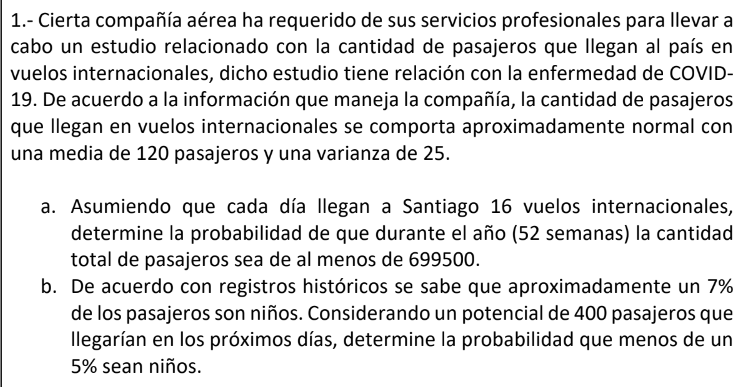

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import norm ,ttest_1samp

In [2]:
media = 120
varianza = 25

# A)

In [3]:
# Asumiendo que cada día llegan a Santiago 16 vuelos internacionales,
# determine la probabilidad de que durante el año (52 semanas) la cantidad
# total de pasajeros sea de al menos de 699500.


In [4]:
vuelos_por_dia = 16
l_inf = 699500

media_pasajeros_por_día = vuelos_por_dia*media
media_pasajeros_por_año = 52*7*media_pasajeros_por_día # 52 semanas con 7 días cada una

varianza_pasajeros_por_día = vuelos_por_dia*varianza
varianza_pasajeros_por_año = 52*7*varianza_pasajeros_por_día
desvest_pasajeros_por_año = np.sqrt(varianza_pasajeros_por_año)


print(f"El promedio de pasajeros por año es {media_pasajeros_por_año}")
print(f"La varianza de pasajeros por año es {varianza_pasajeros_por_año}")
print(f"La desviación estándar de pasajeros por año es {desvest_pasajeros_por_año}")



El promedio de pasajeros por año es 698880
La varianza de pasajeros por año es 145600
La desviación estándar de pasajeros por año es 381.57568056677826


$$ Z = \frac{\bar{x}-\mu}{{{\sigma}}} $$


In [5]:
# Se calcula el valor de estadistico Z para la distribución normal estándar
Z = (l_inf - media_pasajeros_por_año)/desvest_pasajeros_por_año

# P(X >= 699500) = 1 - P(X < 699500)

P = 1 - norm.cdf(Z) # se usa la función de calcular la probabilidad acumulada

print(f"La probabilidad de que la cantidad de pasajeros sea de al menos {l_inf} es de: {P}")


La probabilidad de que la cantidad de pasajeros sea de al menos 699500 es de: 0.05209816823380686


In [33]:
# Comparar con regla empírica de media +- 2*desvest
print(f"Por regla empírica el 95.45 de los datos está contenido entre: [{media_pasajeros_por_año - 2*desvest_pasajeros_por_año}, {media_pasajeros_por_año + 2*desvest_pasajeros_por_año}]")

Por regla empírica el 95.45 de los datos está contenido entre: [698116.8486388664, 699643.1513611336]


In [7]:
# Como se puede apreciar por regla empirica, el 95.45% de la distribución de pasajeros por año se encuentra entre 698116.8486 y 699643.1514
# El valor evaluado de 699500 se encuentra casi al extremo derecho del intervalo obtenido, por lo que es muy poco probable que 
# se obtengan valores mas altos. Por esta razón la probabilidad es tan baja (cercana al 5.2% de probabilidad).

# B)

In [8]:
# De acuerdo con registros históricos se sabe que aproximadamente un 7%
# de los pasajeros son niños. Considerando un potencial de 400 pasajeros que
# llegarían en los próximos días, determine la probabilidad que menos de un
# 5% sean niños.

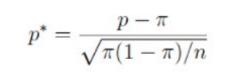

In [16]:
p = 0.07 # probabilidad de que un pasajero sea niño
n = 400 # cantidad de pasajeros que llegarían en los próximos días
l_sup = 0.05 # probabilidad de que menos de un 5% sean niños

# P(X <= 0.05)

p_ast = (l_sup-p)/np.sqrt(p*(1-p)/n) # se calcula el valor de estadistico de proporción para la distribución normal estándar

P = norm.cdf(p_ast)

print(f"La probabilidad de que menos de un {l_sup} sean niños es de: {P}")

La probabilidad de que menos de un 0.05 sean niños es de: 0.058472825370780364


In [ ]:
# Dada la distribución de proporción de pasajeros niños, se puede concluir que la probabilidad de que menos del 5% de los pasajeros sean 
# niños en los próximos vuelos es cercana al 5.85%. Por lo que es una probabilidad bastante baja.

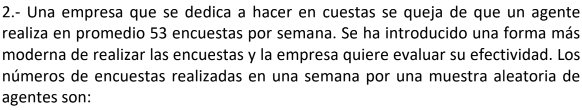

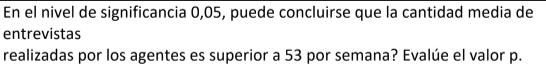

In [31]:
data_encuesta = [53, 57, 50, 55, 58, 54, 60, 52, 59, 62, 60, 60, 51, 59]
media_data_encuesta = np.mean(data_encuesta)

print(f"La media de los datos recopilados es {media_data_encuesta}")

La media de los datos recopilados es 56.42857142857143


In [30]:
alpha = 0.05 # nivel de significancia del test de hipotesis
media_evaluada = 53

# hipotesis nula
# H0: mu = 53
# hipotesis alternativa
# H1: mu > 53

valor_hipotesis = media_evaluada

# P(X >= 53)

# one-sample t-test
_, p_value = ttest_1samp(
    data_encuesta, valor_hipotesis, alternative='greater' # greater para realizar test de cola derecha
)

# Evaluar si p_value es menor que alpha
if p_value < alpha:
    print("Hay evidencia suficiente para rechazar la hipotesis nula.")
else:
    print("No hay evidencia suficiente para rechazar la hipotesis nula, por lo que se asume como verdadera.")

print("El p-value obtenido en este contraste de hipotesis es:", p_value)

Hay evidencia suficiente para rechazar la hipotesis nula.
El p-value obtenido en este contraste de hipotesis es: 0.002826263281109608


In [ ]:
# Dado que el p-value calculado en el contraste de hipótesis es menor que el nivel de significancia del 5%. 
# Se puede afirmar que hay evidencia suficiente para rechazar la hipotesis nula, por lo que se asume que el promedio de encuestas 
# realizadas semanalmente por el encuestador es mayor a 53. 

# Se puede inferir esto de forma rápida (pero no tan precisa) al observar que el promedio de los datos recopilados es de 56.43, un valor
# lo suficientemente mayor a 53 como para rechazar la hipotesis nula de una forma intuitiva. Sin embargo, siempre se debe realizar el
# test de hipotesis para confirmar los hechos.